<a href="https://colab.research.google.com/github/harshitgavita-07/CodeAlpha_Disease-_Prediction-/blob/main/Disease_Prediction_from_medical_data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DISEASE PREDICTION FROM MEDICAL DATA

Dataset loaded successfully!
Shape: (303, 14)

DATA EXPLORATION

First few rows:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       2  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 

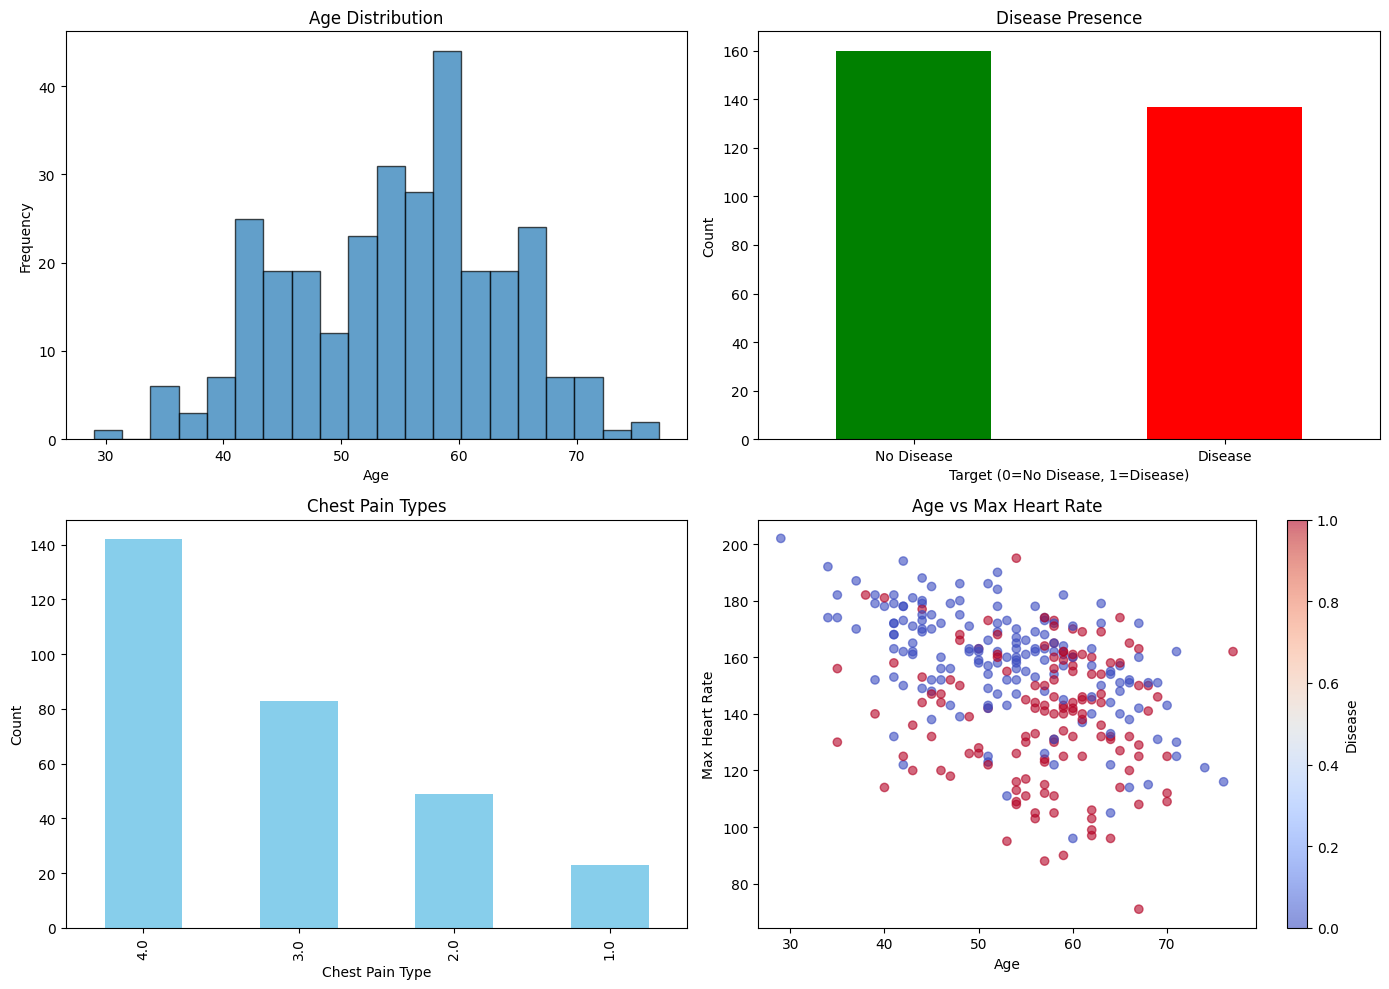

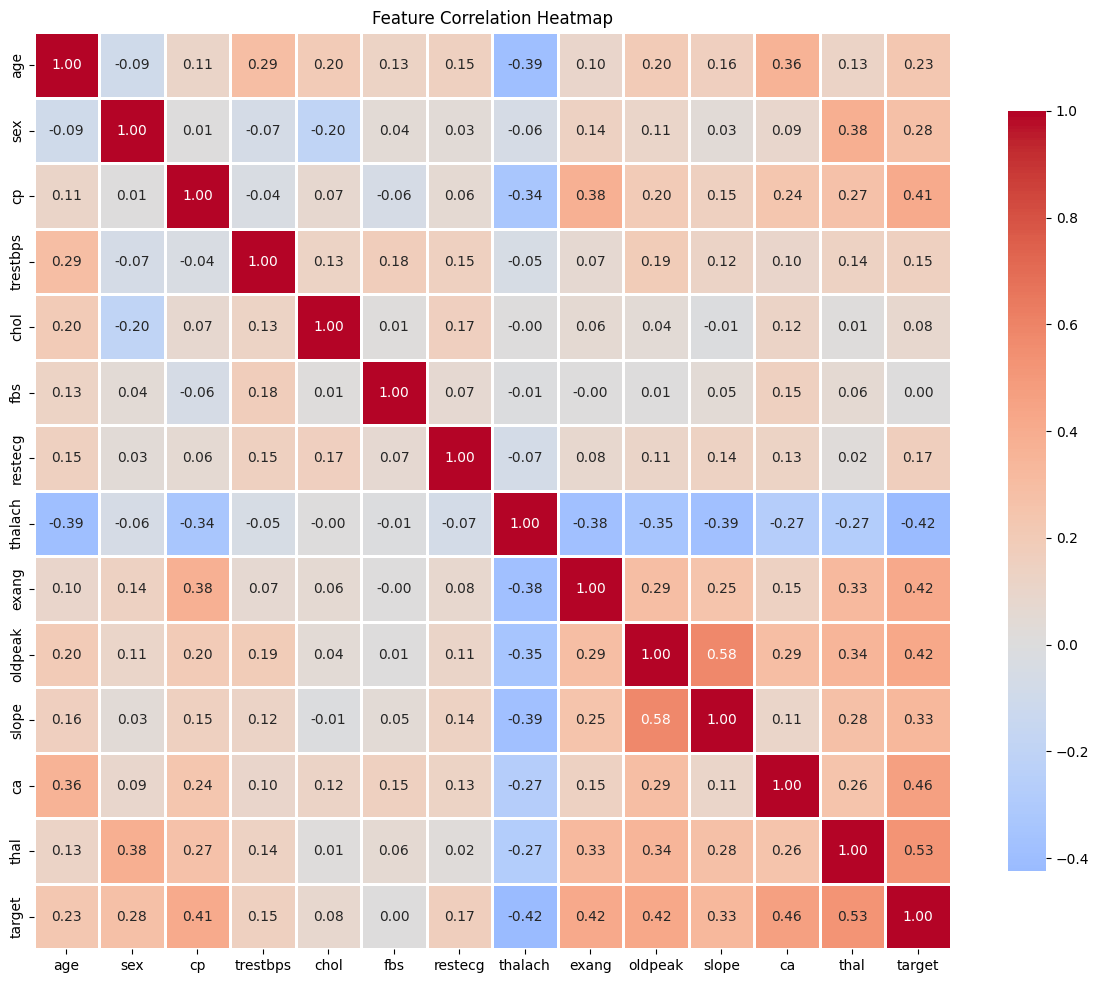


DATA PREPROCESSING
Training samples: 237
Test samples: 60

TRAINING MODELS

MODEL: Logistic Regression
Accuracy:  0.8333
Precision: 0.8462
Recall:    0.7857
F1-Score:  0.8148

MODEL: SVM
Accuracy:  0.8500
Precision: 0.8800
Recall:    0.7857
F1-Score:  0.8302

MODEL: Random Forest
Accuracy:  0.8500
Precision: 0.8800
Recall:    0.7857
F1-Score:  0.8302

MODEL: XGBoost


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [18:00:10] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy:  0.8667
Precision: 0.8846
Recall:    0.8214
F1-Score:  0.8519

MODEL COMPARISON
                     accuracy precision    recall  f1_score
Logistic Regression  0.833333  0.846154  0.785714  0.814815
SVM                      0.85      0.88  0.785714  0.830189
Random Forest            0.85      0.88  0.785714  0.830189
XGBoost              0.866667  0.884615  0.821429  0.851852

🏆 Best Model: XGBoost
Accuracy: 0.8667


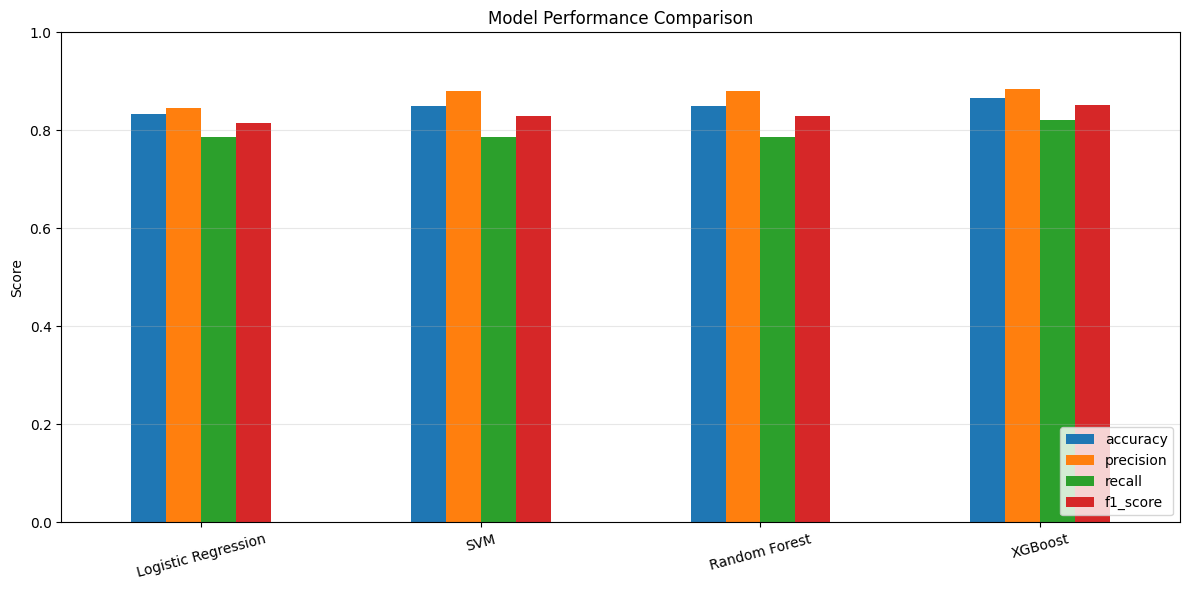

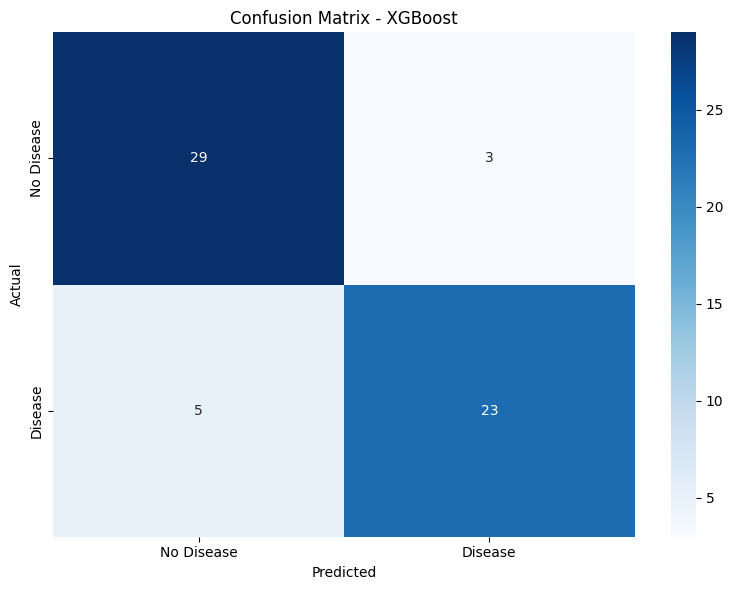

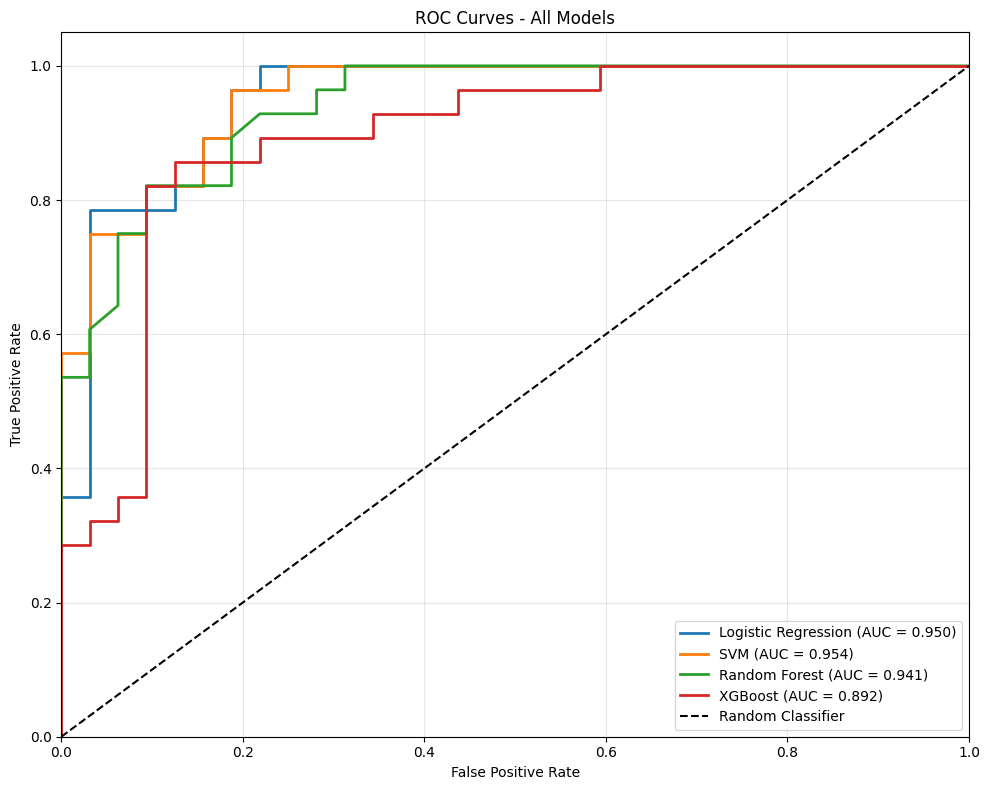


✅ TASK 4 COMPLETED!
Best performing model: XGBoost
All models trained and evaluated successfully!


In [ ]:
# TASK 4: Disease Prediction from Medical Data
# CodeAlpha Machine Learning Internship

# Install required libraries
!pip install scikit-learn pandas numpy matplotlib seaborn xgboost

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

print("="*60)
print("DISEASE PREDICTION FROM MEDICAL DATA")
print("="*60)

# Load Heart Disease Dataset from UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

df = pd.read_csv(url, names=column_names, na_values='?')

print("\nDataset loaded successfully!")
print(f"Shape: {df.shape}")

# Data Exploration
print("\n" + "="*60)
print("DATA EXPLORATION")
print("="*60)

print("\nFirst few rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nMissing values:")
print(df.isnull().sum())

print("\nTarget distribution:")
print(df['target'].value_counts())

# Handle missing values
df = df.dropna()

# Convert target to binary (0 = No disease, 1 = Disease present)
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

print(f"\nBinary target distribution:")
print(df['target'].value_counts())

# Feature names and descriptions
feature_info = {
    'age': 'Age in years',
    'sex': 'Sex (1=male, 0=female)',
    'cp': 'Chest pain type (0-3)',
    'trestbps': 'Resting blood pressure',
    'chol': 'Serum cholesterol',
    'fbs': 'Fasting blood sugar > 120 mg/dl',
    'restecg': 'Resting ECG results (0-2)',
    'thalach': 'Maximum heart rate achieved',
    'exang': 'Exercise induced angina',
    'oldpeak': 'ST depression induced by exercise',
    'slope': 'Slope of peak exercise ST segment',
    'ca': 'Number of major vessels colored',
    'thal': 'Thalassemia (3=normal, 6=fixed, 7=reversible)'
}

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Age distribution
axes[0, 0].hist(df['age'], bins=20, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

# Target distribution
df['target'].value_counts().plot(kind='bar', ax=axes[0, 1], color=['green', 'red'])
axes[0, 1].set_title('Disease Presence')
axes[0, 1].set_xlabel('Target (0=No Disease, 1=Disease)')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_xticklabels(['No Disease', 'Disease'], rotation=0)

# Chest pain types
df['cp'].value_counts().plot(kind='bar', ax=axes[1, 0], color='skyblue')
axes[1, 0].set_title('Chest Pain Types')
axes[1, 0].set_xlabel('Chest Pain Type')
axes[1, 0].set_ylabel('Count')

# Age vs Max Heart Rate
scatter = axes[1, 1].scatter(df['age'], df['thalach'], c=df['target'],
                             cmap='coolwarm', alpha=0.6)
axes[1, 1].set_title('Age vs Max Heart Rate')
axes[1, 1].set_xlabel('Age')
axes[1, 1].set_ylabel('Max Heart Rate')
plt.colorbar(scatter, ax=axes[1, 1], label='Disease')

plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

# Prepare data for modeling
print("\n" + "="*60)
print("DATA PREPROCESSING")
print("="*60)

X = df.drop('target', axis=1)
y = df['target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Multiple Models
print("\n" + "="*60)
print("TRAINING MODELS")
print("="*60)

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

results = {}

for name, model in models.items():
    print(f"\n{'='*50}")
    print(f"MODEL: {name}")
    print(f"{'='*50}")

    # Train model
    if name == 'Random Forest' or name == 'XGBoost':
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }

    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")

# Compare Models
print("\n" + "="*60)
print("MODEL COMPARISON")
print("="*60)

comparison_df = pd.DataFrame(results).T
comparison_df = comparison_df[['accuracy', 'precision', 'recall', 'f1_score']]
print(comparison_df)

# Best model
best_model = comparison_df['accuracy'].idxmax()
print(f"\n🏆 Best Model: {best_model}")
print(f"Accuracy: {comparison_df.loc[best_model, 'accuracy']:.4f}")

# Visualize model comparison
comparison_df.plot(kind='bar', figsize=(12, 6), rot=15)
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Confusion Matrix for best model
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, results[best_model]['y_pred'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.title(f'Confusion Matrix - {best_model}')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

# ROC Curves
plt.figure(figsize=(10, 8))
for name in models.keys():
    fpr, tpr, _ = roc_curve(y_test, results[name]['y_pred_proba'])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - All Models')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\n✅ TASK 4 COMPLETED!")
print(f"Best performing model: {best_model}")
print("All models trained and evaluated successfully!")